In [19]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [20]:
df = pd.read_csv('points.csv')
df.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,clean
292,0,0,0,128,0,0,0,0,0,0,...,0,0,0,0,0,31,2,0,0,1
175,0,0,0,128,0,0,0,0,0,0,...,0,0,0,0,0,175,1,0,0,1
4950,0,0,0,128,0,0,0,0,0,0,...,0,0,0,0,0,36,2,0,0,0
4349,0,0,0,128,0,0,0,0,0,0,...,0,0,0,0,0,146,3,0,0,0
6578,0,0,0,128,0,0,0,0,0,0,...,0,0,0,0,0,181,1,0,0,0


In [21]:
X = df.drop(columns=['clean'])
y = df['clean']

In [22]:
df_std = StandardScaler().fit_transform(X)

scaled_df = pd.DataFrame(df_std, index=X.index, columns=X.columns)
scaled_df

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,-0.389926,-0.393741,-0.374579,-0.468829,-0.390074,-0.394897,-0.375199,-0.468829,-0.397135,-0.398997,...,0.0,0.0,-0.415923,0.0,0.0,0.0,1.470141,-0.529428,0.0,0.0
1,-0.389926,-0.393741,-0.374579,-0.468829,-0.390074,-0.394897,-0.375199,-0.468829,-0.397135,-0.398997,...,0.0,0.0,-0.415923,0.0,0.0,0.0,-1.490026,-0.238846,0.0,0.0
2,-0.389926,-0.393741,-0.374579,-0.468829,-0.390074,-0.394897,-0.375199,-0.468829,-0.397135,-0.398997,...,0.0,0.0,-0.415923,0.0,0.0,0.0,-1.450731,-0.238846,0.0,0.0
3,-0.389926,-0.393741,-0.374579,-0.468829,-0.390074,-0.394897,-0.375199,-0.468829,-0.397135,-0.398997,...,0.0,0.0,-0.415923,0.0,0.0,0.0,1.443945,-0.529428,0.0,0.0
4,-0.389926,-0.393741,-0.374579,-0.468829,-0.390074,-0.394897,-0.375199,-0.468829,-0.397135,-0.398997,...,0.0,0.0,-0.415923,0.0,0.0,0.0,1.692809,-0.529428,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6926,-0.389926,-0.393741,-0.374579,-0.468829,-0.390074,-0.394897,-0.375199,-0.468829,-0.397135,-0.398997,...,0.0,0.0,-0.415923,0.0,0.0,0.0,0.749747,-0.238846,0.0,0.0
6927,-0.389926,-0.393741,-0.374579,-0.468829,-0.390074,-0.394897,-0.375199,-0.468829,-0.397135,-0.398997,...,0.0,0.0,-0.415923,0.0,0.0,0.0,-0.520767,-0.238846,0.0,0.0
6928,-0.389926,-0.393741,-0.374579,-0.468829,-0.390074,-0.394897,-0.375199,-0.468829,-0.397135,-0.398997,...,0.0,0.0,-0.415923,0.0,0.0,0.0,0.173431,-0.238846,0.0,0.0
6929,-0.389926,-0.393741,-0.374579,-0.468829,-0.390074,-0.394897,-0.375199,-0.468829,-0.397135,-0.398997,...,0.0,0.0,-0.415923,0.0,0.0,0.0,-0.822023,-0.238846,0.0,0.0


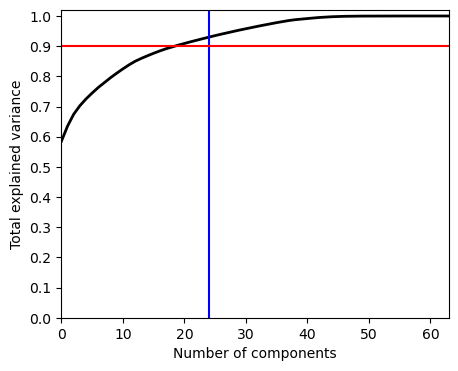

CPU times: user 467 ms, sys: 6.76 ms, total: 474 ms
Wall time: 85 ms


In [23]:
%%time

pca = PCA().fit(scaled_df)

plt.figure(figsize=(5,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 63)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(24, c='b')
plt.axhline(0.9, c='r')
plt.show();

In [24]:
%%time

pca = PCA(n_components=25)

principalComponents = pca.fit_transform(scaled_df)

principalDf = pd.DataFrame(data = principalComponents)

evr = pca.explained_variance_ratio_
evr.sum()

CPU times: user 90 ms, sys: 3.96 ms, total: 93.9 ms
Wall time: 15.6 ms


0.9297770431449368

In [25]:
X_train, X_test, y_train, y_test = train_test_split(principalDf, y, test_size=0.2)

In [26]:
models = {}

from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC()

from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy, precision, recall = {}, {}, {}

for key in models.keys():
    
    # Fit the classifier
    models[key].fit(X_train, y_train)
    
    # Make predictions
    predictions = models[key].predict(X_test)
    
    # Calculate metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)

In [28]:
import pandas as pd

df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

,Accuracy,Precision,Recall
Logistic Regression,0.653208,0.663877,0.664804
Support Vector Machines,0.659697,0.665272,0.672779
Decision Trees,0.742610,0.750349,0.751397
Random Forest,0.783706,0.786611,0.793249
Naive Bayes,0.579668,0.887029,0.558875
K-Nearest Neighbor,0.731074,0.714086,0.752941


In [29]:
import pickle

with open('models/bin_cls_RF.pkl','wb') as f:
    pickle.dump(models['Random Forest'], f)
    
with open('models/pca_binary_cls.pkl','wb') as f:
    pickle.dump(pca, f)